# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Downloading data

In [2]:
insurance_data = pd.read_csv('Datasets/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_data.shape

(1338, 7)

In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# EDA

<Figure size 1440x1440 with 0 Axes>

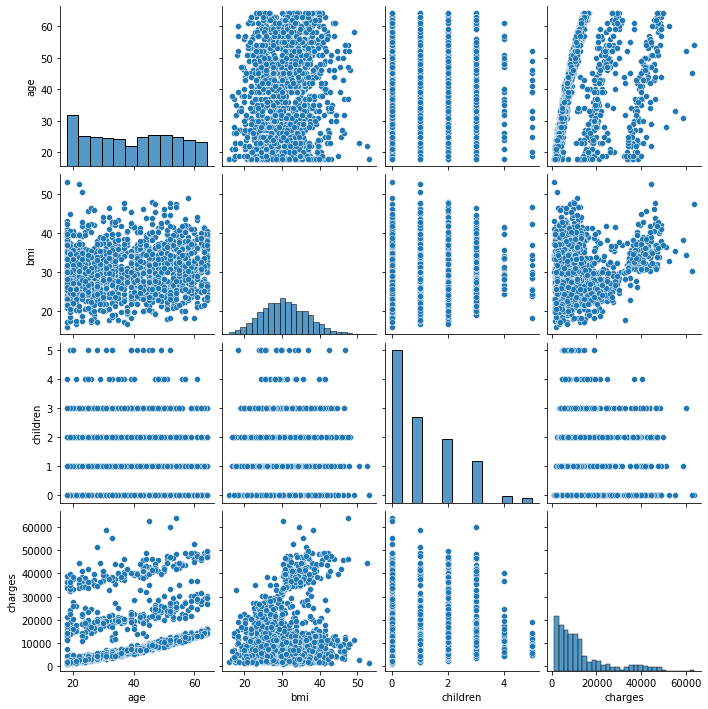

In [6]:
plt.figure(figsize = (20,20))
sns.pairplot(insurance_data)

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


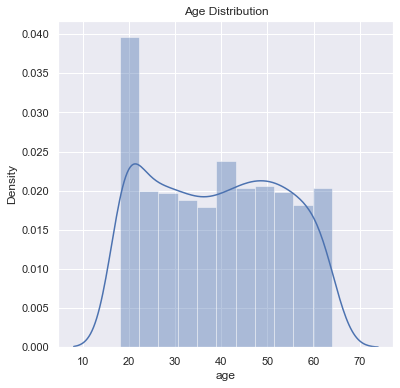

In [7]:
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurance_data['age'])
plt.title('Age Distribution')
plt.show()

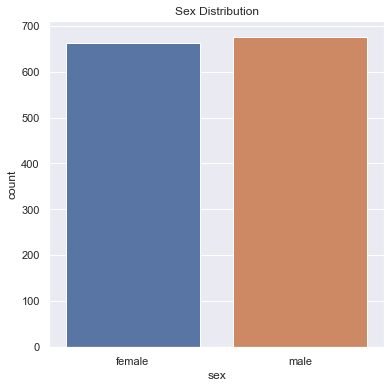

In [8]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'sex', data = insurance_data)
plt.title('Sex Distribution')
plt.show()

In [9]:
insurance_data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


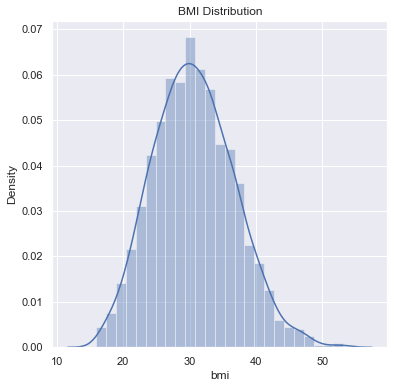

In [10]:
plt.figure(figsize = (6,6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

`Normal BMI Range - 18.5 to 24.9`

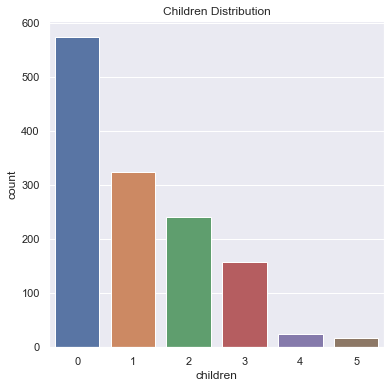

In [11]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'children', data = insurance_data)
plt.title('Children Distribution')
plt.show()

In [12]:
insurance_data.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

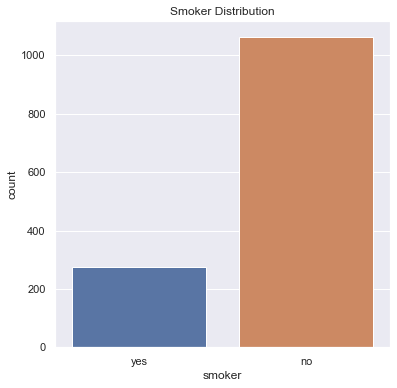

In [13]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker', data = insurance_data)
plt.title('Smoker Distribution')
plt.show()

In [14]:
insurance_data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

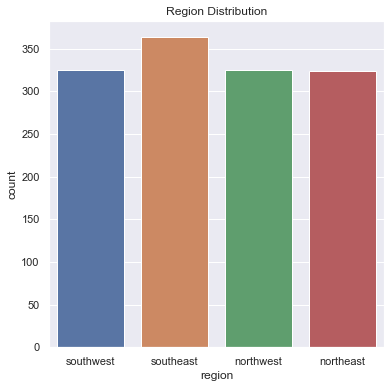

In [15]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'region', data = insurance_data)
plt.title('Region Distribution')
plt.show()

In [16]:
insurance_data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


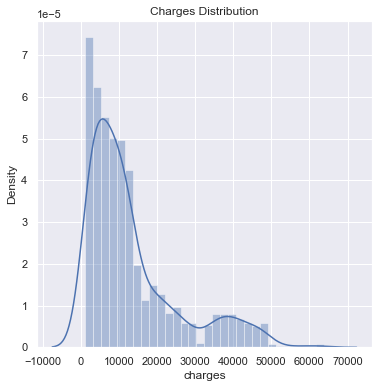

In [17]:
plt.figure(figsize = (6,6))
sns.distplot(insurance_data['charges'])
plt.title('Charges Distribution')
plt.show()

# Data Preprocessing

Encoding the categorical features

In [18]:
insurance_data.replace({'sex':{'male':0,'female':1}}, inplace = True)
insurance_data.replace({'smoker':{'yes':0,'no':1}}, inplace = True)
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace = True)

In [19]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting the features and the target

In [20]:
X = insurance_data.drop(columns = 'charges', axis =1)
y = insurance_data.charges
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


In [21]:
y[:5]

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Splitting the data into training and testing data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
X.shape,X_train.shape,X_test.shape

((1338, 6), (1070, 6), (268, 6))

# Model training

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
train_predictions = model.predict(X_train)
r_squared_score1 = metrics.r2_score(y_train, train_predictions)
print('R squared value for training data:',r_squared_score1)

R squared value for training data: 0.751505643411174


In [25]:
test_predictions = model.predict(X_test)
r_squared_score2 = metrics.r2_score(y_test, test_predictions)
print('R squared value for test data:',r_squared_score2)

R squared value for test data: 0.7447273869684077


# Build a predictive system

In [26]:
input_data = (31,1,25.74,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print('The prediction cost is USD',prediction[0])

The prediction cost is USD 3760.0805764960587


C:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
